In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
import jax.numpy as jnp
import jax.random as r

import matplotlib.pyplot as plt

In [3]:
import sys
import os

# Navigate the current notebook directory to src directory
current_dir = os.getcwd()
jax_eco_dir = os.path.dirname(os.path.dirname(current_dir))
src_dir = os.path.join(jax_eco_dir, 'src')
sys.path.append(jax_eco_dir)

# Now you can import the module
import src.gp_from_scratch as g

In [4]:
x = jnp.linspace(start=0, stop=1, num=100).reshape(-1, 1)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
zm = g.ZeroMean()

In [60]:
# 1D test
x = jnp.linspace(start=0, stop=1, num=30).reshape(-1, 1)

GP0 = g.GP(mean=g.ZeroMean(), kernel=g.RBFKernel(lengthscale=0.1))

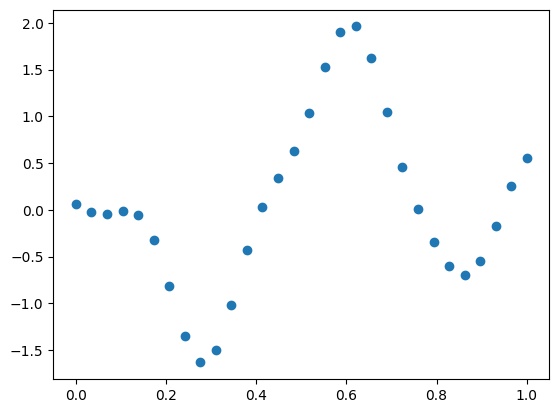

In [61]:
key0 = r.PRNGKey(0)
y = GP0.sample(x=x, key=key0)
plt.scatter(x, y)

In [57]:
cov = GP0.kernel.matrix(x, x)
mean = GP0.mean.vector(x)

In [59]:
r.multivariate_normal(key0, mean, cov, method='svd')

Array([ 0.05923829, -0.02202709, -0.04670704, -0.01298792, -0.05343681,
       -0.3195745 , -0.8185658 , -1.3485326 , -1.6316341 , -1.4991419 ,
       -1.0162458 , -0.42876604,  0.03350742,  0.33560473,  0.623762  ,
        1.0344446 ,  1.5251163 ,  1.9044666 ,  1.9599401 ,  1.6256856 ,
        1.0442562 ,  0.45626923,  0.00431847, -0.33917275, -0.5965505 ,
       -0.7008728 , -0.5460949 , -0.17033336,  0.25629345,  0.5490223 ],      dtype=float32)

In [38]:
GP0.kernel.matrix(x, x).shape

(100, 100)